Business problem 1
a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan
amounts)

In [1]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv('LoansData.csv')

# Convert interest rate to numeric
data['Interest.Rate'] = data['Interest.Rate'].str.rstrip('%').astype('float')

# Create bins for loan amounts (for example: low, medium, high)
bins = [0, 10000, 20000, 35000]  # Adjust these bins as necessary
labels = ['Low', 'Medium', 'High']
data['LoanAmountCategory'] = pd.cut(data['Amount.Requested'], bins=bins, labels=labels)

# Perform ANOVA test
anova_results = stats.f_oneway(
    data[data['LoanAmountCategory'] == 'Low']['Interest.Rate'].dropna(),
    data[data['LoanAmountCategory'] == 'Medium']['Interest.Rate'].dropna(),
    data[data['LoanAmountCategory'] == 'High']['Interest.Rate'].dropna()
)

# Print the results
print(f'ANOVA F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}')

# Interpretation of p-value
if anova_results.pvalue < 0.05:
    print("Reject the null hypothesis: Interest rate varies for different loan amounts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in interest rates for different loan amounts.")


ANOVA F-statistic: 136.91826561303418, p-value: 3.7984727569262646e-57
Reject the null hypothesis: Interest rate varies for different loan amounts.


Business problem 1 b. Loan length is directly effecting intrest rate.

In [2]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv('LoansData.csv')

# Convert interest rate to numeric
data['Interest.Rate'] = data['Interest.Rate'].str.rstrip('%').astype('float')

# Perform ANOVA test based on Loan Length
anova_results = stats.f_oneway(
    data[data['Loan.Length'] == '36 months']['Interest.Rate'].dropna(),
    data[data['Loan.Length'] == '60 months']['Interest.Rate'].dropna()
)

# Print the results
print(f'ANOVA F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}')

# Interpretation of p-value
if anova_results.pvalue < 0.05:
    print("Reject the null hypothesis: Loan length directly affects the interest rate.")
else:
    print("Fail to reject the null hypothesis: Loan length does not significantly affect the interest rate.")


ANOVA F-statistic: 547.7623939093271, p-value: 1.0952664487989141e-109
Reject the null hypothesis: Loan length directly affects the interest rate.


Business problem - 1 c. Inrest rate varies for different purpose of loans

In [3]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv('LoansData.csv')

# Convert interest rate to numeric
data['Interest.Rate'] = data['Interest.Rate'].str.rstrip('%').astype('float')

# Perform ANOVA test based on Loan Purpose
loan_purposes = data['Loan.Purpose'].unique()
interest_rates = [data[data['Loan.Purpose'] == purpose]['Interest.Rate'].dropna() for purpose in loan_purposes]

anova_results = stats.f_oneway(*interest_rates)

# Print the results
print(f'ANOVA F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}')

# Interpretation of p-value
if anova_results.pvalue < 0.05:
    print("Reject the null hypothesis: Interest rate varies for different purposes of loans.")
else:
    print("Fail to reject the null hypothesis: No significant difference in interest rates for different loan purposes.")


ANOVA F-statistic: 7.481404351302254, p-value: 1.1686298123677374e-14
Reject the null hypothesis: Interest rate varies for different purposes of loans.


Business problem 1 d. There is relationship between FICO scores and Home Ownership. It means that, People
with owning home will have high FICO scores.

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv('LoansData.csv')

# Create a contingency table between FICO range and Home Ownership
contingency_table = pd.crosstab(data['FICO.Range'], data['Home.Ownership'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square statistic: {chi2}, p-value: {p}')

# Interpretation of p-value
if p < 0.05:
    print("Reject the null hypothesis: There is a relationship between FICO scores and home ownership.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between FICO scores and home ownership.")


Chi-Square statistic: 473.05246368346025, p-value: 1.2021592010244615e-35
Reject the null hypothesis: There is a relationship between FICO scores and home ownership.


BUSINESS PROBLEM 2: We would like to assess if there is any difference in the average
price quotes provided by Mary and Barry.

In [5]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv('Price_Quotes.csv')

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(data['Barry_Price'], data['Mary_Price'])

# Print the results
print(f'Paired t-test statistic: {t_statistic}, p-value: {p_value}')

# Interpretation of p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average price quotes provided by Mary and Barry.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average price quotes provided by Mary and Barry.")


Paired t-test statistic: 2.5213765108923494, p-value: 0.02840588045242053
Reject the null hypothesis: There is a significant difference in the average price quotes provided by Mary and Barry.


BUSINESS PROBLEM 3: Determine what effect, if any, the reengineering effort had on the
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Is there evidence that the critical incidence rate
improved?

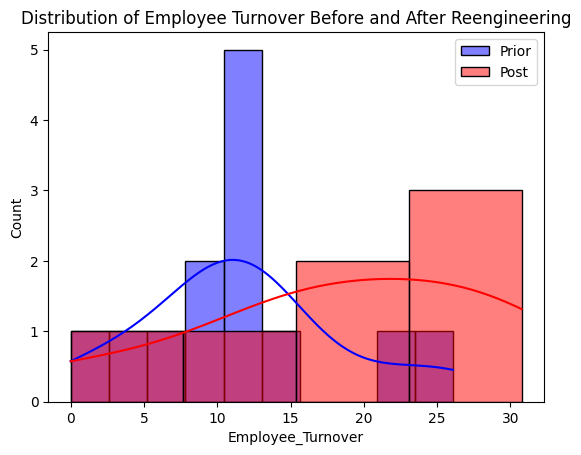

Employee Turnover - t-statistic: -1.770306704753604, p-value: 0.09361109345535304
Fail to reject the null hypothesis: There is no significant difference in Employee Turnover between Prior and Post reengineering periods.

TRFF (%) - t-statistic: 2.783398448880451, p-value: 0.012265082138734354
Reject the null hypothesis: There is a significant difference in TRFF (%) between Prior and Post reengineering periods.

CI (%) - t-statistic: 1.627914425352865, p-value: 0.12091989189884148
Fail to reject the null hypothesis: There is no significant difference in CI (%) between Prior and Post reengineering periods.



In [6]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Treatment_Facility.csv')

# Renaming columns for clarity
data.columns = ['Month', 'Reengineer', 'Employee_Turnover', 'TRFF', 'CI']

# Separate data into Prior and Post reengineering
prior_data = data[data['Reengineer'] == 'Prior']
post_data = data[data['Reengineer'] == 'Post']

# Function to perform and print t-test results
def perform_t_test(prior, post, variable_name):
    t_statistic, p_value = stats.ttest_ind(prior, post)
    print(f'{variable_name} - t-statistic: {t_statistic}, p-value: {p_value}')
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in {variable_name} between Prior and Post reengineering periods.\n")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in {variable_name} between Prior and Post reengineering periods.\n")

# Check normality of the data (optional step)
sns.histplot(prior_data['Employee_Turnover'], kde=True, color='blue', label='Prior')
sns.histplot(post_data['Employee_Turnover'], kde=True, color='red', label='Post')
plt.legend()
plt.title('Distribution of Employee Turnover Before and After Reengineering')
plt.show()

# Perform t-tests
perform_t_test(prior_data['Employee_Turnover'], post_data['Employee_Turnover'], 'Employee Turnover')
perform_t_test(prior_data['TRFF'], post_data['TRFF'], 'TRFF (%)')
perform_t_test(prior_data['CI'], post_data['CI'], 'CI (%)')


BUSINESS PROBLEM 4: We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether this is, in fact, occurring.

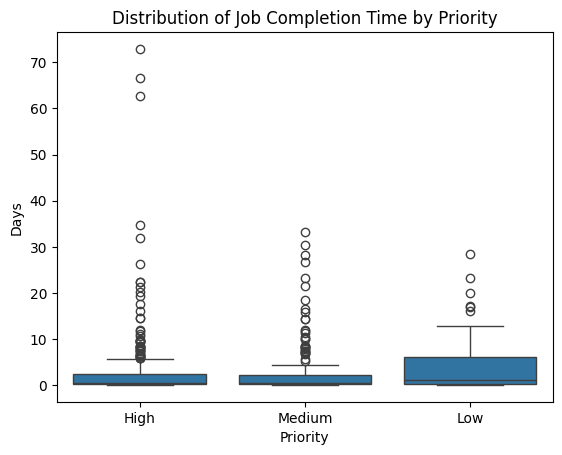

          count      mean       std  min  25%  50%    75%   max
Priority                                                       
High      326.0  3.023620  7.781368  0.1  0.2  0.6  2.475  72.9
Low        67.0  4.228358  6.269450  0.1  0.3  1.2  6.150  28.5
Medium    249.0  2.500000  5.011664  0.1  0.2  0.5  2.200  33.2
                   sum_sq     df         F    PR(>F)
C(Priority)    161.671780    2.0  1.812311  0.164115
Residual     28501.804248  639.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low   1.2047 0.3709 -0.8998 3.3093  False
  High Medium  -0.5236 0.6205 -1.8441 0.7968  False
   Low Medium  -1.7284 0.1452 -3.8876 0.4309  False
---------------------------------------------------


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
data = pd.read_csv('Priority_Assessment.csv')

# Visualize the data
sns.boxplot(x='Priority', y='Days', data=data)
plt.title('Distribution of Job Completion Time by Priority')
plt.show()

# Descriptive Statistics
priority_stats = data.groupby('Priority')['Days'].describe()
print(priority_stats)

# ANOVA test
model = ols('Days ~ C(Priority)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Post-hoc test (Tukey's HSD)
tukey = pairwise_tukeyhsd(endog=data['Days'], groups=data['Priority'], alpha=0.05)
print(tukey)


BUSINESS PROBLEM 5: Use the survey results to address the following questions
 What is the overall level of customer satisfaction?
 What factors are linked to satisfaction?
 What is the demographic profile of Film on the Rocks patrons?
 In what media outlet(s) should the film series be advertised?

Missing values in each column:
 _rowstate_          0
Movie               0
Gender            330
Marital_Status    330
Sinage              2
Parking             2
Clean               3
Overall             2
Age                 2
Income             16
Hear_About          7
dtype: int64
           Sinage     Parking       Clean     Overall
count  325.000000  325.000000  325.000000  325.000000
mean     1.876923    1.763077    1.683077    1.618462
std      0.829764    0.798836    0.729360    0.690967
min      1.000000    1.000000    1.000000    1.000000
25%      1.000000    1.000000    1.000000    1.000000
50%      2.000000    2.000000    2.000000    2.000000
75%      2.000000    2.000000    2.000000    2.000000
max      5.000000    5.000000    5.000000    5.000000
Correlation Matrix:
           Sinage   Parking     Clean   Overall
Sinage   1.000000  0.477380  0.348438  0.380801
Parking  0.477380  1.000000  0.442839  0.517907
Clean    0.348438  0.442839  1.000000  0.347257
Overall  0.3808

<ipython-input-9-32ffe92bf98d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[satisfaction_columns] = data_cleaned[satisfaction_columns].astype(float)


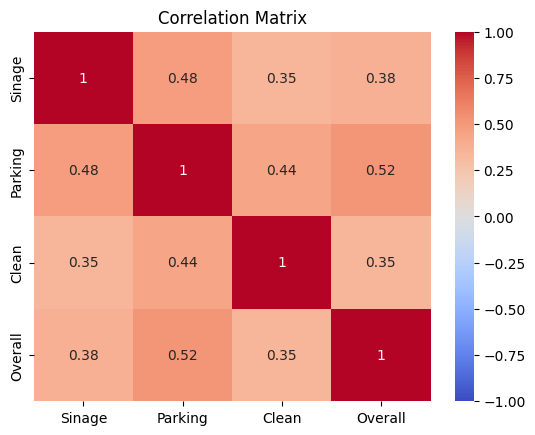

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('Films.csv')

# Clean and preprocess the data
data['Gender'] = data['Gender'].map({1: 'Male', 2: 'Female'})
data['Marital_Status'] = data['Marital_Status'].map({1: 'Married', 2: 'Single'})
data['Age'] = data['Age'].map({1: '1-12', 2: '13-30', 3: '31-60', 4: '60+'})
data['Income'] = data['Income'].map({1: 'Less than $50,000', 2: '$50,000-$100,000', 3: '$100,000+'})

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values in the satisfaction columns
data_cleaned = data.dropna(subset=['Sinage', 'Parking', 'Clean', 'Overall'])

# Ensure that the data types are appropriate for correlation
satisfaction_columns = ['Sinage', 'Parking', 'Clean', 'Overall']
data_cleaned[satisfaction_columns] = data_cleaned[satisfaction_columns].astype(float)

# Descriptive statistics for satisfaction
satisfaction_summary = data_cleaned[satisfaction_columns].describe()
print(satisfaction_summary)

# Correlation analysis
correlation_matrix = data_cleaned[satisfaction_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [10]:
overall_satisfaction = data_cleaned['Overall'].mean()
overall_satisfaction_distribution = data_cleaned['Overall'].value_counts(normalize=True) * 100
print("Mean Overall Satisfaction Score:", overall_satisfaction)
print("Overall Satisfaction Distribution:\n", overall_satisfaction_distribution)


Mean Overall Satisfaction Score: 1.6184615384615384
Overall Satisfaction Distribution:
 Overall
2.0    48.615385
1.0    46.153846
3.0     3.692308
5.0     1.230769
4.0     0.307692
Name: proportion, dtype: float64


In [11]:
correlation_matrix = data_cleaned[['Sinage', 'Parking', 'Clean', 'Overall']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
            Sinage   Parking     Clean   Overall
Sinage   1.000000  0.477380  0.348438  0.380801
Parking  0.477380  1.000000  0.442839  0.517907
Clean    0.348438  0.442839  1.000000  0.347257
Overall  0.380801  0.517907  0.347257  1.000000


In [15]:
import pandas as pd

# Load the data (make sure your path and data format are correct)
data = pd.read_csv('Films.csv')

# Clean the data (remove or fill missing values as needed)
data_cleaned = data.dropna(subset=['Gender', 'Marital_Status', 'Age', 'Income'])

# Convert categorical columns to string if they are not already
data_cleaned['Gender'] = data_cleaned['Gender'].astype(str)
data_cleaned['Marital_Status'] = data_cleaned['Marital_Status'].astype(str)
data_cleaned['Age'] = data_cleaned['Age'].astype(str)
data_cleaned['Income'] = data_cleaned['Income'].astype(str)

# Calculate the demographic profile
demographic_profile = data_cleaned[['Gender', 'Marital_Status', 'Age', 'Income']].value_counts(normalize=True) * 100

print("Demographic Profile:\n", demographic_profile)


Demographic Profile:
 Gender  Marital_Status  Age  Income
2       2               2.0  1.0       19.032258
1       2               2.0  1.0        9.677419
2       1               3.0  3.0        7.096774
                             2.0        5.806452
        2               2.0  2.0        5.483871
                        3.0  1.0        5.161290
                        2.0  3.0        5.161290
1       1               3.0  3.0        4.516129
        2               2.0  2.0        4.193548
2       2               1.0  3.0        2.903226
1       2               3.0  2.0        2.258065
2       2               3.0  2.0        1.935484
1       1               3.0  2.0        1.935484
        2               2.0  3.0        1.612903
        1               2.0  1.0        1.290323
2       2               1.0  1.0        1.290323
Male    Single          2.0  3.0        1.290323
1       2               3.0  1.0        1.290323
2       2               1.0  2.0        0.967742
1       1  

<ipython-input-15-9c5e22db039a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Gender'] = data_cleaned['Gender'].astype(str)
<ipython-input-15-9c5e22db039a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Marital_Status'] = data_cleaned['Marital_Status'].astype(str)
<ipython-input-15-9c5e22db039a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [12]:
media_effectiveness = data_cleaned['Hear_About'].value_counts(normalize=True) * 100
print("Media Outlet Effectiveness:\n", media_effectiveness)


Media Outlet Effectiveness:
 Hear_About
5      70.219436
4      12.852665
1       6.583072
3       4.075235
2       3.761755
2,5     0.626959
3,4     0.626959
4,5     0.313480
1,5     0.313480
5,4     0.313480
3,5     0.313480
Name: proportion, dtype: float64
